# Kings County Housing Sales Analysis

Student: Bonny Nichol<br>
Self Paced<br>
Scheduled Date: February 28, 2020<br>
Instructor Name: Jeff Herman<br>
Blog Post URL:<br>

# Objective
The objective of this project is to predict the sales prices of houses in Kings County, WA.<br> 
This project will use the OSEMiN Data Science Method. Obtaining, Scrubbing, Exploring, Modeling, and Interpreting Data. 


## 00 Introduction
Kings County Demographics<br>
Data Science Methods<br>
Python Libraries Used<br>

## 01 Obtain Data
Importing Data from .CSV file<br>
Observing Values and Missing Data<br>
First Visualizations to Observe Data


## 02 Data Cleaning
Resolving Missing Values<br>
Making sure data is normally distributed<br>
Removing outliers

## 03 Data Exploration
Finding P-values

## 04 Model Data
Train-Test-Split<br>
Regression

## 05 Interprete Data

***
## Introduction

#### Kings County Demographics

#### Data Science Methods

#### Python Libraries <br>
Pandas <br>
Seaborn <br>
Numpy <br>
Matplotlib.pyplot

In [1]:
#data and visualizations
import pandas as pd
import seaborn as sns
import numpy as np

#modeling
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

#feature selection
from sklearn.feature_selection import RFE

%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 21)
pd.set_option('display.max_rows', 70)

***
## Step One: Obtain Data

The first process of OSEMiN data science method is to bring the data into the Python environment. Typcially, the data can exist in many formats including MySQL, Oracle, MongoDB. The data can come from Website APIs, scraped data from the web or flat text data types like datasets from Kaggle. For this project we are importing a CSV file and using the Pandas library for this conversion into Python.
***

In [2]:
# load dataset
df = pd.read_csv('kc_house_data.csv')
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
5,7237550310,5/12/2014,1230000.00,4,4.50,5420,101930,1.00,0.00,0.00,3,11,3890,1530.0,2001,0.00,98053,47.66,-122.00,4760,101930
6,1321400060,6/27/2014,257500.00,3,2.25,1715,6819,2.00,0.00,0.00,3,7,1715,?,1995,0.00,98003,47.31,-122.33,2238,6819
7,2008000270,1/15/2015,291850.00,3,1.50,1060,9711,1.00,0.00,nan,3,7,1060,0.0,1963,0.00,98198,47.41,-122.31,1650,9711
8,2414600126,4/15/2015,229500.00,3,1.00,1780,7470,1.00,0.00,0.00,3,7,1050,730.0,1960,0.00,98146,47.51,-122.34,1780,8113
9,3793500160,3/12/2015,323000.00,3,2.50,1890,6560,2.00,0.00,0.00,3,7,1890,0.0,2003,0.00,98038,47.37,-122.03,2390,7570


Let's do a quick check of our data to check for missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


From the above we learned valuable metadata of our dataset like the number of cols and rows, the number of values in each column and the data type of each column.

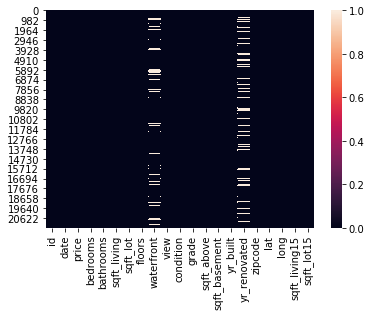

In [4]:
sns.heatmap(df.isnull())
plt.show()

We can tell from the heatmap and from the full summary of the dataframe, columns 'waterfront', 'yr_renovated' and 'view' are missing data. We will resolve this when we clean the data.

***
## First Visualizations

***
This dataset includes 21597 data observations with 21 features described below.
<br>
<br>__id__ id number for the data entry
<br>__date__ date the house was sold
<br>__price__ price of the house
<br>__bedrooms__ number of bedrooms in the house
<br>__bathrooms__ number of bathrooms in the house
<br>__sqft_living__ square footage of the living room
<br>__sqft_lot__ square footage of the lot size
<br>__floors__ number of floors in the house
<br>__waterfront__ if the house is located at the waterfront (1 = yes, 0 = no)
<br>__view__ does the house have a view
<br>__condition__ condition of the house
<br>__grade__ grade level of the house
<br>__sqft_above__ square footage of the house not including the basement
<br>__sqft_basement__ square footage of only the basement
<br>__yr_built__ year the house was built
<br>__yr_renovated__ year the house was renovated
<br>__zipcode__ zipcode where the house is located
<br>__lat__ latitude where the house is located
<br>__long__ longitude where the house is located
<br>__sqft_living15__ square footage of the living area in 2015 (this implies there were renovations)
<br>__sqft_lot15__ square footage of the lot size in 2015


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1fce6400>,
      dtype=object)

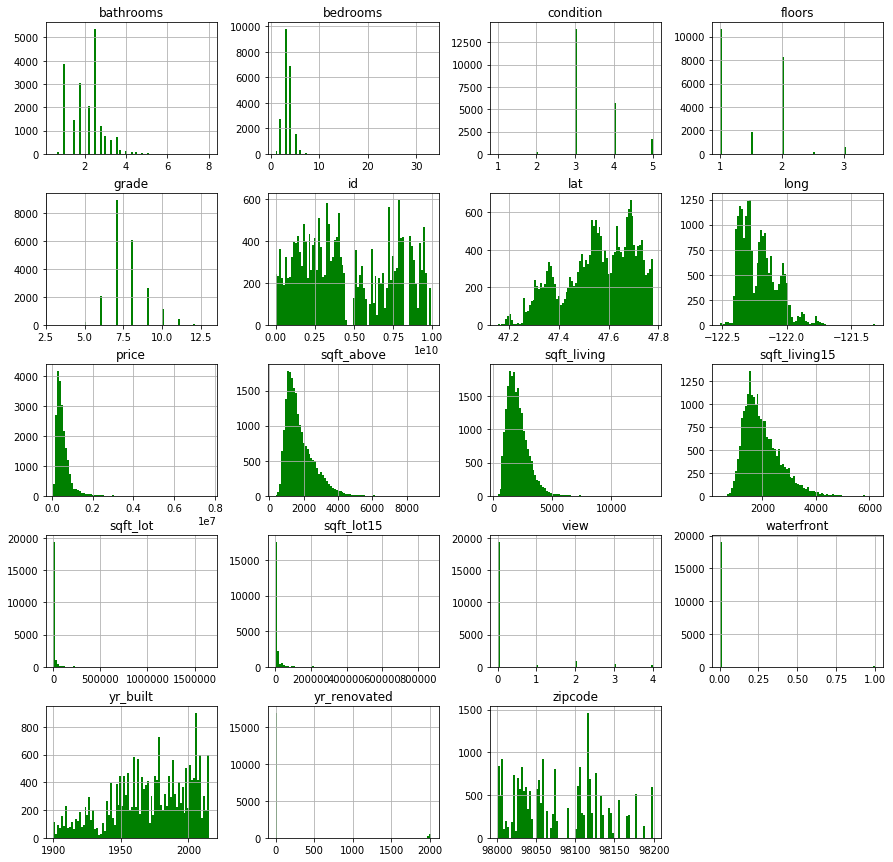

In [5]:
#Finding Outliers and exploring pre-scrubbed data
df.hist(bins = 80, color= 'green', figsize=(15,15), grid = True)

There is not a lot of normalized data here.

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


We can begin to see some big problems with the data such as the bedrooms feature having a max data entry of 33 bedrooms. 

## Step Two: Data Cleaning

The goal of scrubbing data is to create standardized data formats so that later in the project there will not be any interferences with the model.<br>

We see in our initial observations that we have missing values, non normally distributed data, outliers, and other problems with out data that we must solve now.

1. Replacing missing values with median value
2. Cleaning up data types
3. Dropping unnecessary columns 


In [7]:
#sorting by id
sortedbyid = df.sort_values('id')
sortedbyid.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.00,6,3.00,2400,9373,2.00,0.00,0.00,3,7,2400,0.0,1991,0.00,98002,47.33,-122.21,2060,7316
2494,1000102,9/16/2014,280000.00,6,3.00,2400,9373,2.00,nan,0.00,3,7,2400,0.0,1991,0.00,98002,47.33,-122.21,2060,7316
6729,1200019,5/8/2014,647500.00,4,1.75,2060,26036,1.00,nan,0.00,4,8,1160,900.0,1947,0.00,98166,47.44,-122.35,2590,21891
8404,1200021,8/11/2014,400000.00,3,1.00,1460,43000,1.00,0.00,0.00,3,7,1460,0.0,1952,0.00,98166,47.44,-122.35,2250,20023
8800,2800031,4/1/2015,235000.00,3,1.00,1430,7599,1.50,0.00,0.00,4,6,1010,420.0,1930,0.00,98168,47.48,-122.27,1290,10320
3553,3600057,3/19/2015,402500.00,4,2.00,1650,3504,1.00,0.00,0.00,3,7,760,890.0,1951,2013.00,98144,47.58,-122.29,1480,3504
18506,3600072,3/30/2015,680000.00,4,2.75,2220,5310,1.00,nan,0.00,5,7,1170,1050.0,1951,nan,98144,47.58,-122.29,1540,4200
3197,3800008,2/24/2015,178000.00,5,1.50,1990,18200,1.00,nan,0.00,3,7,1990,0.0,1960,nan,98178,47.49,-122.26,1860,8658
21047,5200087,7/9/2014,487000.00,4,2.50,2540,5001,2.00,0.00,0.00,3,9,2540,0.0,2005,0.00,98108,47.54,-122.30,2360,6834
4329,6200017,11/12/2014,281000.00,3,1.00,1340,21336,1.50,0.00,0.00,4,5,1340,0.0,1945,0.00,98032,47.40,-122.27,1340,37703


There are clear duplicates for ID. This is probably because the houses were sold multiple times after renovation. This data might be useful later.

In [8]:
#Resolving Missing Values 
#Replacing 'waterfront' and 'yr_renovated' NaN values with median values
#We are replacing with median values to avoid outliers

df['waterfront'].fillna(df['waterfront'].median(), inplace = True)
df['yr_renovated'].fillna(df['yr_renovated'].median(), inplace = True)    

# replacing NaN values in 'View' with 0 and making it an integer
df.loc[df.view.isna(), 'view'] = 0
df.view = df.view.astype('int')

#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(12), object(2)
memory usage: 3.5+ MB


This is starting to look better but now I want to deal with the object types of 'date' and 'sqft_basement'. First I will change the date into a datetime format.

In [9]:
# Converting date to datetime
df.date = pd.to_datetime(df.date)

In [10]:
#Tidying up fields of data
#Replacing '?' in 'sqft_basement' with 0

df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')

In [11]:
#checking for extraneous values by reviewing top occuring values in each feature
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620    0.00
1825069031   0.00
2019200220   0.00
7129304540   0.00
1781500435   0.00
Name: id, dtype: float64 


date 
 2014-06-23   0.01
2014-06-25   0.01
2014-06-26   0.01
2014-07-08   0.01
2015-04-27   0.01
Name: date, dtype: float64 


price 
 350000.00   0.01
450000.00   0.01
550000.00   0.01
500000.00   0.01
425000.00   0.01
Name: price, dtype: float64 


bedrooms 
 3   0.45
4   0.32
2   0.13
5   0.07
6   0.01
Name: bedrooms, dtype: float64 


bathrooms 
 2.50   0.25
1.00   0.18
1.75   0.14
2.25   0.09
2.00   0.09
Name: bathrooms, dtype: float64 


sqft_living 
 1300   0.01
1400   0.01
1440   0.01
1660   0.01
1010   0.01
Name: sqft_living, dtype: float64 


sqft_lot 
 5000   0.02
6000   0.01
4000   0.01
7200   0.01
7500   0.01
Name: sqft_lot, dtype: float64 


floors 
 1.00   0.49
2.00   0.38
1.50   0.09
3.00   0.03
2.50   0.01
Name: floors, dtype: float64 


waterfront 
 0.00   0.99
1.00   0.01
Name: waterfront, dtype: float64 


view 
 0   0.90
2   0.04
3   0.02
1   0

The above is useful for determining the quality of our data. In other words, we can see that features like waterfront, view, sqft_basement, and yr_renovated all have values where the majority is 0.0.  

In [12]:
#Dropping Unnecessary Columns
to_drop = ['id', 'grade', 'lat', 'long', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'sqft_above']

df.drop(to_drop, axis=1, inplace=True)
df.head(20)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode
0,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0.00,0,3,1955,0.00,98178
1,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0.00,0,3,1951,1991.00,98125
2,2015-02-25,180000.00,2,1.00,770,10000,1.00,0.00,0,3,1933,0.00,98028
3,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0.00,0,5,1965,0.00,98136
4,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0.00,0,3,1987,0.00,98074
5,2014-05-12,1230000.00,4,4.50,5420,101930,1.00,0.00,0,3,2001,0.00,98053
6,2014-06-27,257500.00,3,2.25,1715,6819,2.00,0.00,0,3,1995,0.00,98003
7,2015-01-15,291850.00,3,1.50,1060,9711,1.00,0.00,0,3,1963,0.00,98198
8,2015-04-15,229500.00,3,1.00,1780,7470,1.00,0.00,0,3,1960,0.00,98146
9,2015-03-12,323000.00,3,2.50,1890,6560,2.00,0.00,0,3,2003,0.00,98038


## Step Three: Data Exploration

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c20f4ecf8>,
      dtype=object)

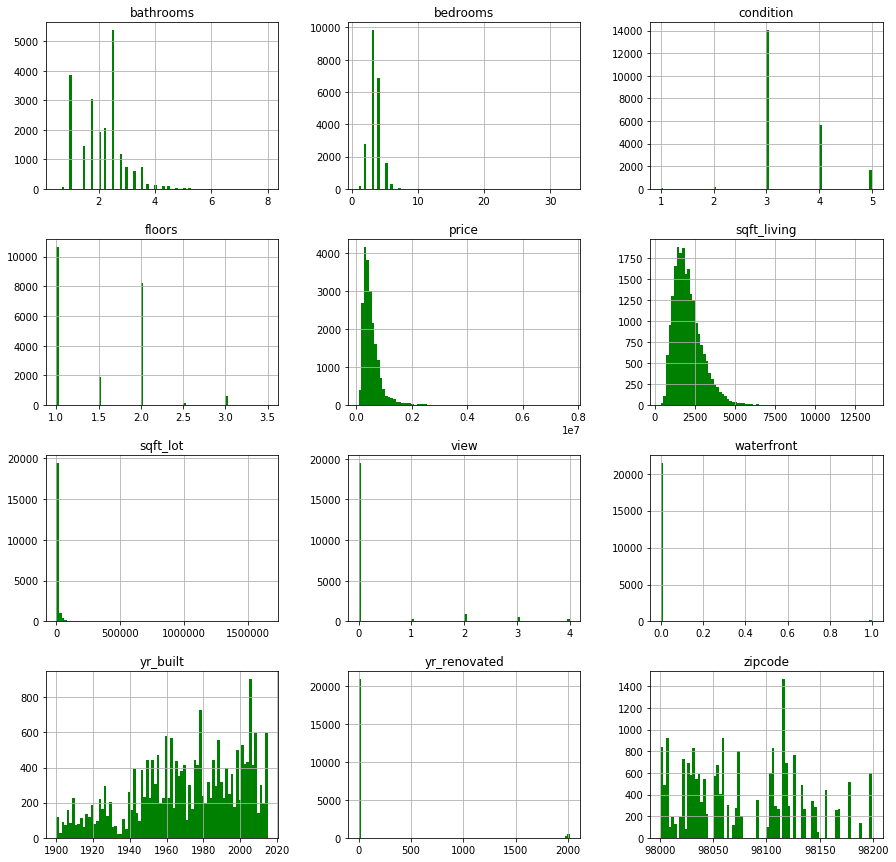

In [13]:
#Viewing our histogram of each feature again post-cleaning the data
df.hist(bins = 80, color= 'green', figsize=(15,15), grid = True)

In [14]:
# observing measures of central tendency 
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,1971.00,68.76,98077.95
std,367368.14,0.93,0.77,918.11,41412.64,0.54,0.08,0.76,0.65,29.38,364.04,53.51
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,1900.00,0.00,98001.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,1951.00,0.00,98033.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,1975.00,0.00,98065.00
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,1997.00,0.00,98118.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,2015.00,2015.00,98199.00


In [15]:
price = df['price']

minimum_price = np.min(price) #minimum price in dataset
maximum_price = np.max(price) #maximum price in dataset
mean_price = round(np.mean(price), 2) #mean price rounded to 2 decimal places
median_price = np.median(price) #median price
std_price = round(np.std(price), 2) # standard deviation of price rounded to 2 decimal places

#printing results
print('Stats for Kings County Housing Prices: \n')
print('Minimum price: ' + str(minimum_price) + '\n')
print('Maximum price: ' + str(maximum_price) + '\n')
print('Mean price: ' + str(mean_price) + '\n')
print('Median price: ' + str(median_price) + '\n')
print('Standard Deviation of Prices: ' + str(std_price) + '\n')

Stats for Kings County Housing Prices: 

Minimum price: 78000.0

Maximum price: 7700000.0

Mean price: 540296.57

Median price: 450000.0

Standard Deviation of Prices: 367359.63



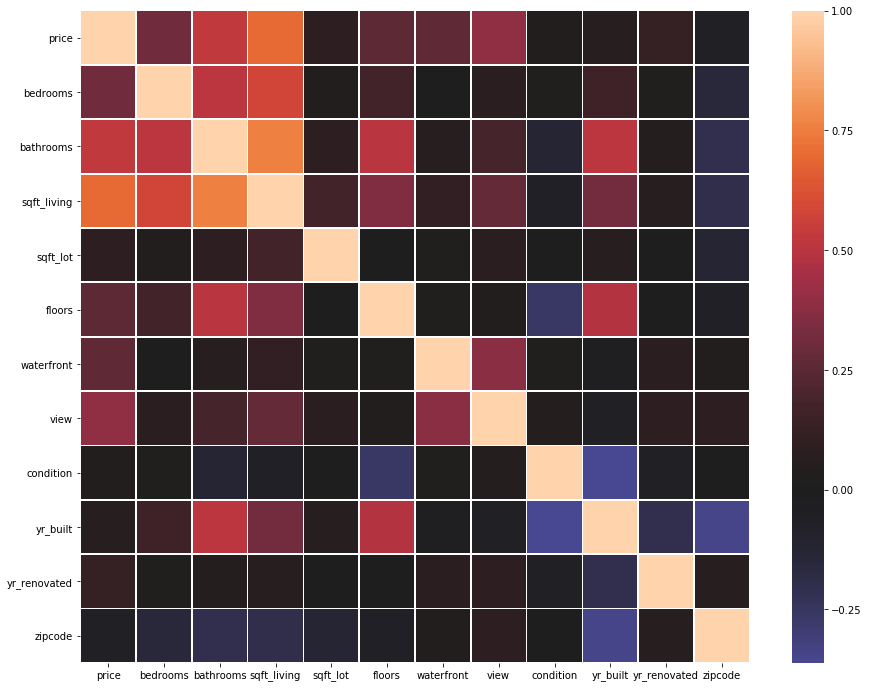

In [16]:
#Investigating Multicollinearity
f, ax = plt.subplots(figsize=(15,12))

sns.heatmap(df.corr(), center=0, linewidths=.8, cmap="icefire");

## Step Four: Model Data

### Train-Test-Split
It is important to create a sample of data from our dataset to test our model with in order to avoid overfitting or underfitting the model. The data will need to be randomly split so the model will not be overfit to a specific segment of data.

In [17]:
feature_cols = 
y = data[['price']]
X = data.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

#Linear Regression
#linreg = LinearRegression()
#linreg.fit(X_train, y_train)
#y_pred = linreg.predict(X_test)
    
#Cross Validation

#Feature Selection

SyntaxError: invalid syntax (<ipython-input-17-ec5f60003e89>, line 1)

## Step Five: Interprete Data